In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import *
#from sklearn.models import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [4]:
from sklearn.metrics import mean_squared_error as mse

In [5]:
df = pd.read_csv('inputs/DS1_1440.csv')

In [7]:
from sklearn.preprocessing import MinMaxScaler
from processing import create_features, split_data
from LSSVMRegression import LSSVMRegression as LSSVM

In [8]:
def adjust_params(params):
    gamma = np.power(10, params[0]).astype(float)
    sigma = np.power(10, params[1]).astype(float)
    m = int(params[2])
    return [gamma, sigma, m]

In [9]:
global X

In [10]:
def f(p):
    gamma = np.power(10, p[0]).astype(float)
    sigma = np.power(10, p[1]).astype(float)
    m = int(p[2])
#     series = pd.Series(X)
    x, y = create_features(X, m)
    tr_len = int(.5*X.shape[0])
    Xtr, Xval, Xte = split_data(x, tr_len)
    ytr, yval, yte = split_data(y, tr_len)
#     ytr = tr_arr['t']
#     xtr = tr_arr.drop('t', axis=1)
#     yval = val_arr['t']
#     xval = val_arr.drop('t', axis=1)
    
    reg = LSSVM(kernel='rbf', gamma=gamma, sigma=sigma)
    reg.fit(Xtr, ytr)
    yp = reg.predict(Xval)
    return mse(yval, yp)

In [11]:
D = 3
lb = [-2, -2, 1]
ub = [3, 3, 25]
nPop = 25
maxit = 100
lambda_ = 5

In [12]:
all_results_eb = {}

In [19]:
from ebqpso import EBQPSO

In [20]:
X = df.wind_speed.values

In [21]:
params, best_err, hist = EBQPSO(f, D, nPop, lb, ub, maxit, lambda_)

In [22]:
all_results_eb["params"] = params
all_results_eb["best_err"] = best_err
all_results_eb["hist"] = hist

In [24]:
import pickle

In [25]:
file = open('lssvm_ebqpso_1', 'ab')
pickle.dump(all_results_eb, file)
file.close()

## May-Dataset

In [28]:
df = pd.read_csv('inputs/DS2_1448.csv')

In [29]:
X = df.wind_speed.values

In [30]:
all_results_eb = {}

In [31]:
params, best_err, hist = EBQPSO(f, D, nPop, lb, ub, maxit, lambda_)

In [32]:
all_results_eb["params"] = params
all_results_eb["best_err"] = best_err
all_results_eb["hist"] = hist

In [33]:
file = open('lssvm_ebqpso_2', 'ab')
pickle.dump(all_results_eb, file)
file.close()

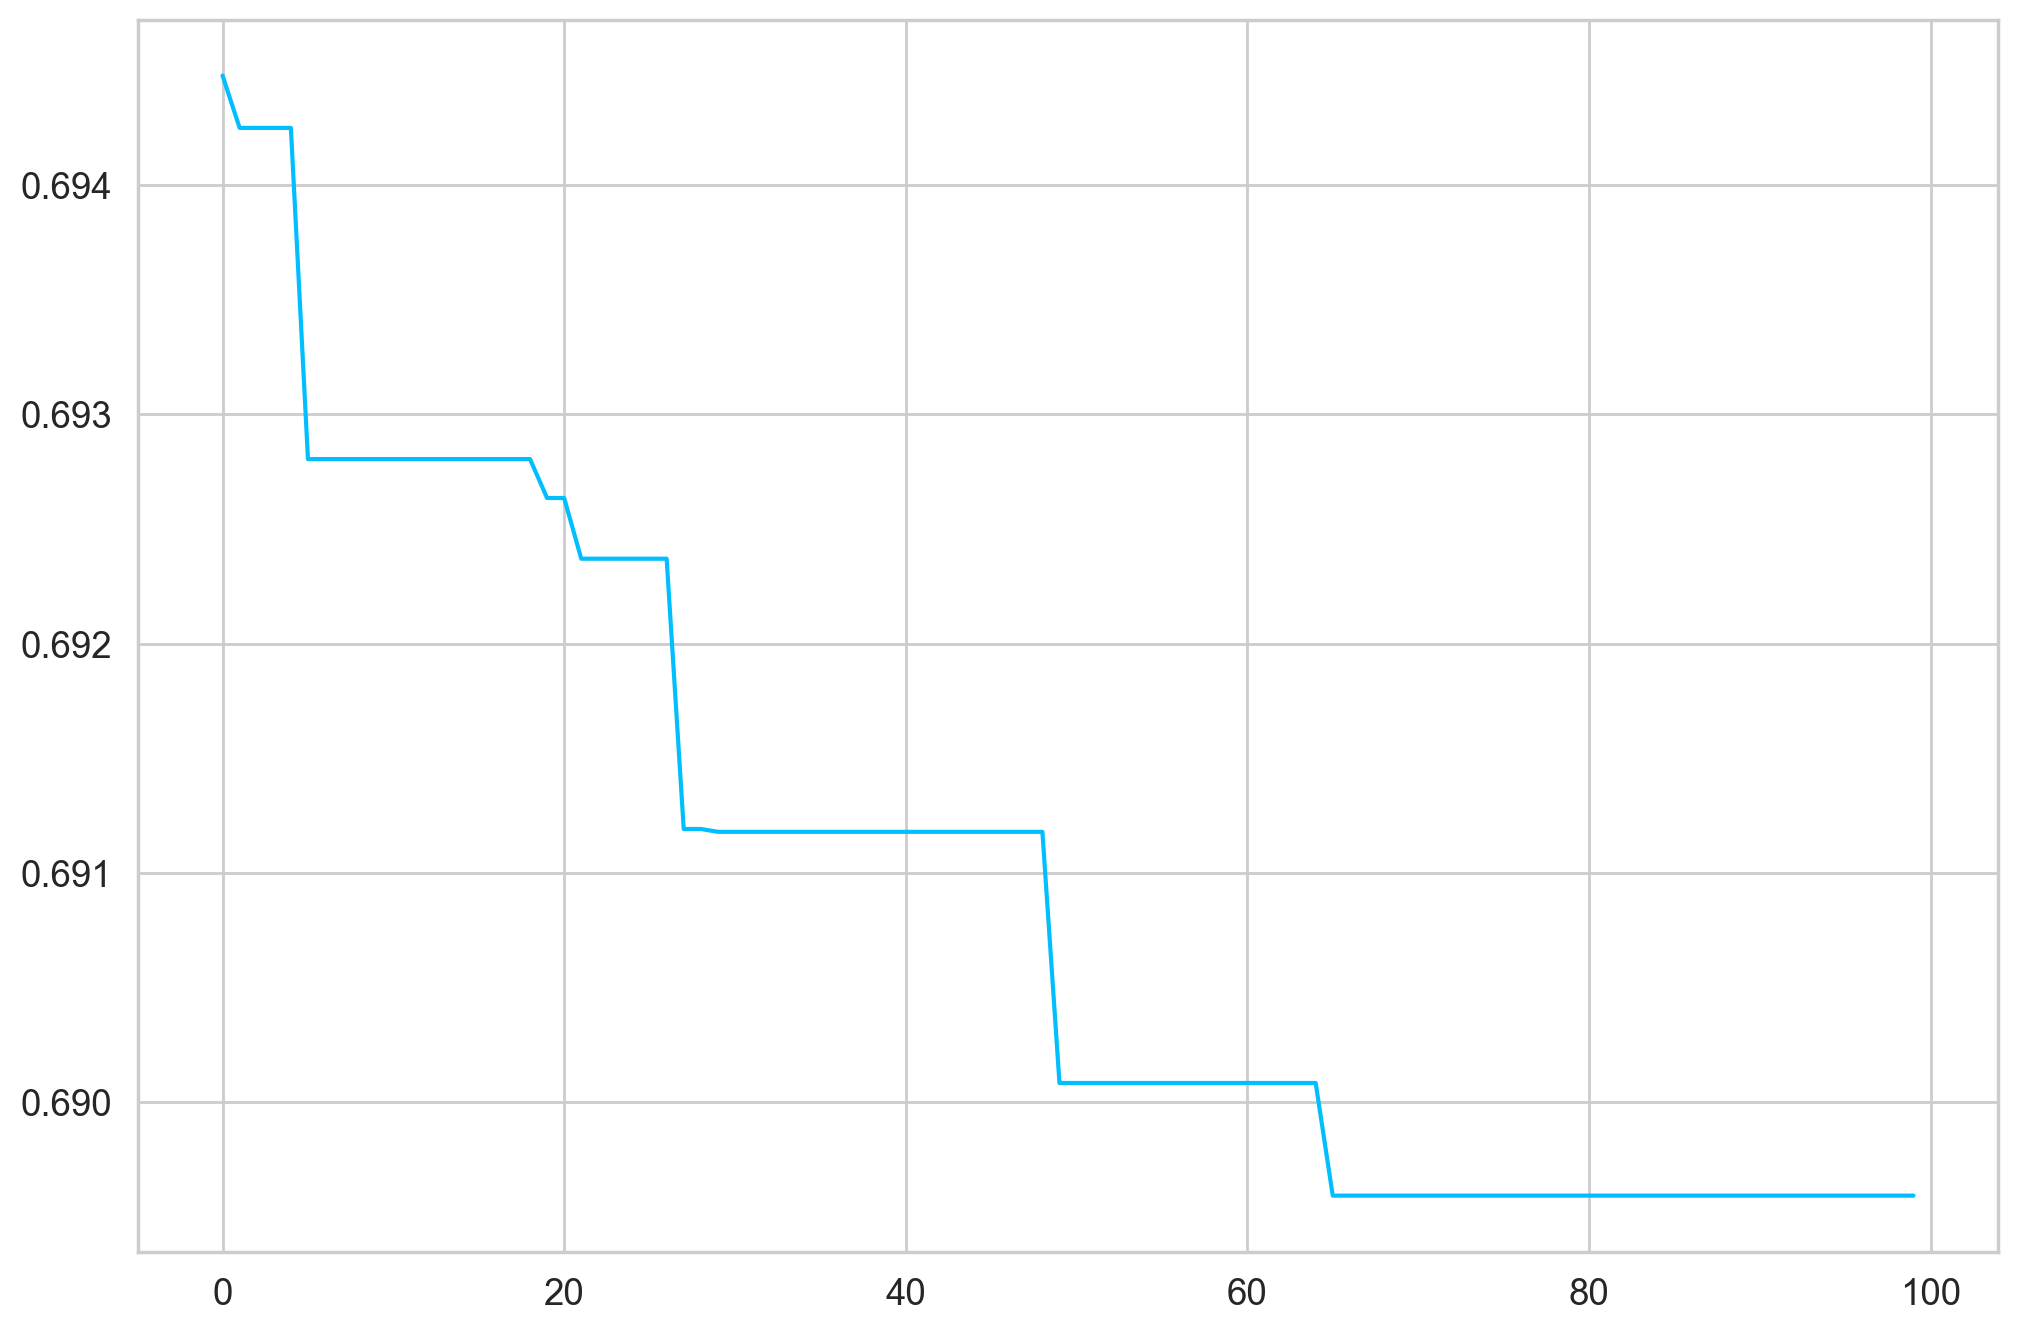

In [34]:
plt.plot(all_results_eb["hist"])